In [ ]:
## Les données du patient 4 ont des bonnes charactéristiques (SNR) sans aucun filtrage 

# A Faire

# 1 - Lire Article de Lotte
# 2 - Faire BE MNE et prendre en main la structure
# 3 - Se concentrer sur le patient 4 et un autre patient avec des moins bonnes charactéristiques.
#     a) Filtrer les hautes fréquences (>60Hz)
#     b) Afficher le spectrogramme 
# https://mne.tools/dev/auto_examples/time_frequency/time_frequency_erds.html#sphx-glr-auto-examples-time-frequency-time-frequency-erds-py
#     b) Afficher le topoplot
#     c) Afficher la principale composante et le mouvement 
# 4 - Comprendre les slidings windows et se les approprier 
# 5 - Implémenter une pipeline

In [ ]:
motor_electrods_d = ['FC2', 'FC4', 'FC6', 
                         'C2', 'C4', 'C6',
                         'CP2', 'CP4', 'CP6']

motor_electrods_g = ['FC1', 'FC3', 'FC5',
                          'C1', 'C3', 'C5',
                          'CP1', 'CP3', 'CP5']

In [55]:
# Import of modules
from preprocessing.data_loader import DataLoader

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import signal
from scipy.fft import fft, ifft, fftfreq
from sklearn.decomposition import PCA



In [74]:
FILE_PATH = '../../data/raw/Data_npy/DATA_004_Trial1.npy'
loader = DataLoader(FILE_PATH)

left: shape before resampling: (29982,), shape after resampling: (245609,)
left: shape of cinematic signals before resampling: (29982,),               shape after resampling: (245609,)
left: shape of eeg signal: 245609
right: shape before resampling: (28056,), shape after resampling: (229827,)
right: shape of cinematic signals before resampling: (28056,),                 shape after resampling: (229827,)
right: shape of eeg signal: 229827


In [75]:
X = loader.signal_left_arm
X = pd.DataFrame(X)
signal = loader.get_raws(side="G")
data, time = signal['movement']
y = data[0]


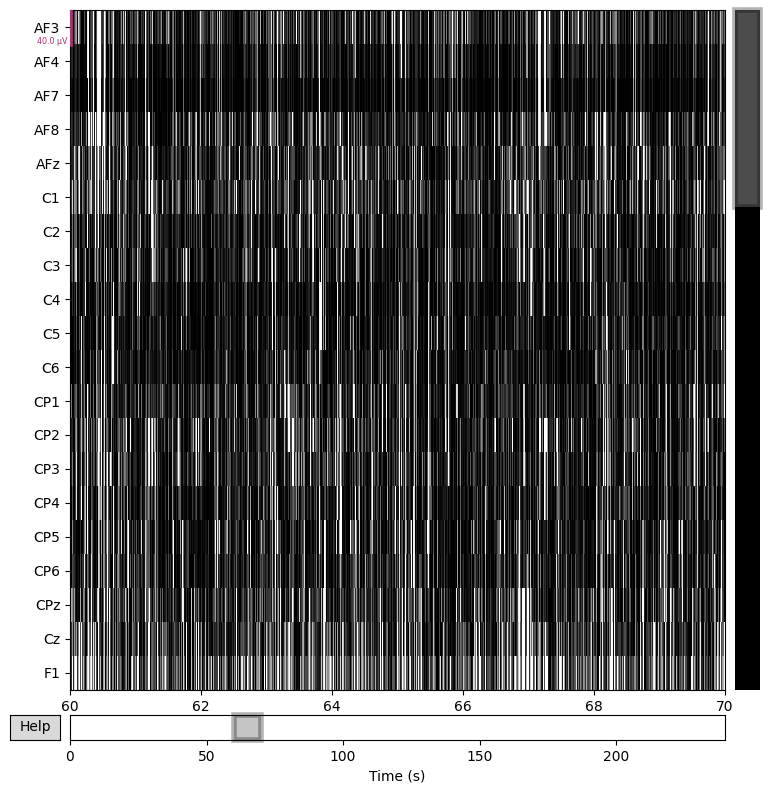

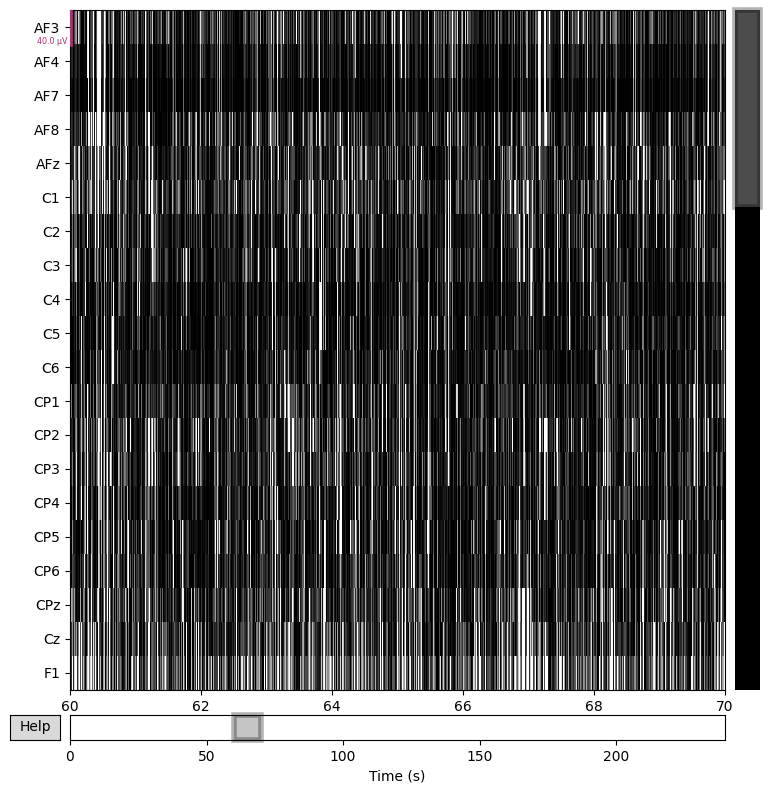

In [66]:

# signal.filter(l_freq=0.1, h_freq=40)
signal.plot(start=60)

In [47]:
pca = PCA(n_components=5)
new_X =  pca.fit_transform(X)
pca.explained_variance_ratio_

array([0.22246028, 0.12429976, 0.09839119, 0.08926359, 0.06086389])

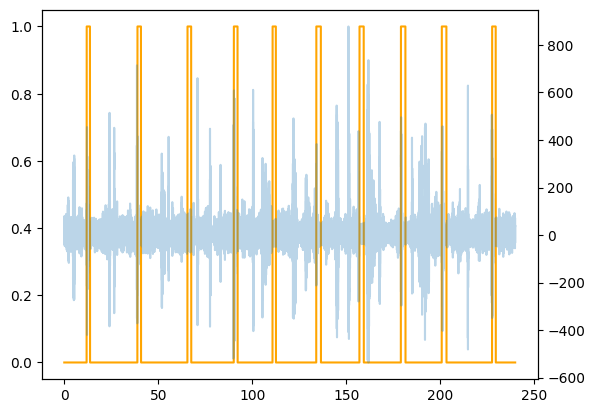

In [49]:
plt.plot(time,data[0], c="orange")
plt.twinx()
plt.plot(time,new_X[:,0], alpha = 0.3)
# plt.xlim(90,110)

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# model = DecisionTreeClassifier()
model = SVC()
model.fit(new_X[:,:2],y)

SVC()

In [57]:
FILE_PATH_2 = '../../data/raw/Data_npy/DATA_004_Trial2.npy'
loader_2 = DataLoader(FILE_PATH_2)
X_2 = loader_2.signal_left_arm
X_2 = pd.DataFrame(X_2)
signal_2 = loader_2.get_raws(side="G")
data_2, time_2 = signal_2['movement']
y_2 = data_2[0]
new_X_2 =  pca.fit_transform(X_2)
y_pred = model.predict(new_X_2[:,:2])

left: shape before resampling: (28484,), shape after resampling: (233337,)
left: shape of cinematic signals before resampling: (28484,),               shape after resampling: (233337,)
left: shape of eeg signal: 233337
right: shape before resampling: (28289,), shape after resampling: (231738,)
right: shape of cinematic signals before resampling: (28289,),                 shape after resampling: (231738,)
right: shape of eeg signal: 231738


In [60]:
y_pred.sum()

2.0

(0.0, 50.0)

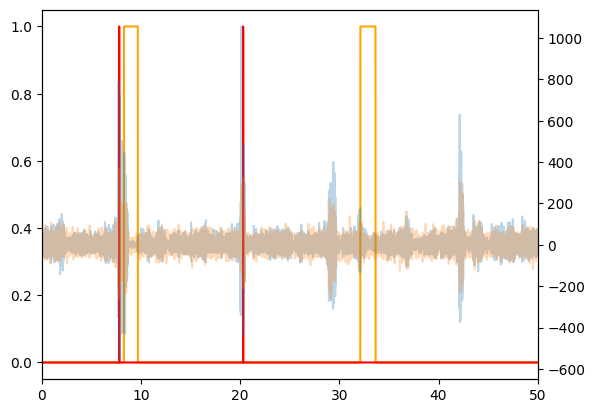

In [61]:
data_2, time_2 = signal_2['movement']
plt.plot(time_2,data_2[0], c="orange")
plt.plot(time_2,y_pred,c="red")
plt.twinx()
plt.plot(time_2,new_X_2[:,:2], alpha = 0.3)
plt.xlim(0,50)

In [40]:
y.sum()

17210.0

In [102]:
loader = DataLoader(FILE_PATH)
raw = loader.get_raws(side ="G")
print(raw.info)
raw_copy = raw.copy()


left: shape before resampling: (29982,), shape after resampling: (245609,)
left: shape of cinematic signals before resampling: (29982,),               shape after resampling: (245609,)
left: shape of eeg signal: 245609
right: shape before resampling: (28056,), shape after resampling: (229827,)
right: shape of cinematic signals before resampling: (28056,),                 shape after resampling: (229827,)
right: shape of eeg signal: 229827
<Info | 7 non-empty values
 bads: []
 ch_names: AF3, AF4, AF7, AF8, AFz, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, ...
 chs: 64 EEG, 5 misc
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 512.0 Hz
 meas_date: unspecified
 nchan: 69
 projs: []
 sfreq: 1024.0 Hz
>


['movement', 'VAC3d', 'AC3d', 'VAC', 'AC', 'TP8']

In [111]:

raw_copy.pick(picks = 'eeg')
raw_copy.info   

<Info | 7 non-empty values
 bads: []
 ch_names: AF3, AF4, AF7, AF8, AFz, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, ...
 chs: 64 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 512.0 Hz
 meas_date: unspecified
 nchan: 64
 projs: []
 sfreq: 1024.0 Hz
>